In [2]:
# https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset

In [3]:
############################################# 1. ################################################### 
# (Import Data / EDA)

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
# Mounting the google colab drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
import chardet
with open("/content/drive/MyDrive/Xccelerate/ML Project/Online Payments Fraud Detection Dataset.csv",'rb') as rawdata:
  result=chardet.detect(rawdata.read(100000))
result

{'confidence': 1.0, 'encoding': 'ascii', 'language': ''}

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Xccelerate/ML Project/Online Payments Fraud Detection Dataset.csv", encoding='ISO-8859-1')

In [8]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
df.drop(['nameOrig','nameDest','type'],axis='columns',inplace=True)

In [10]:
"""
DATA SET SAMPLE SIZE: 3000000 / 
"""
df=df.iloc[:10000,:] 

In [11]:
df.shape

(10000, 8)

In [12]:
df.isFraud.value_counts()/len(df)*100

0    99.32
1     0.68
Name: isFraud, dtype: float64

In [13]:
# The data is highly imbalanced.

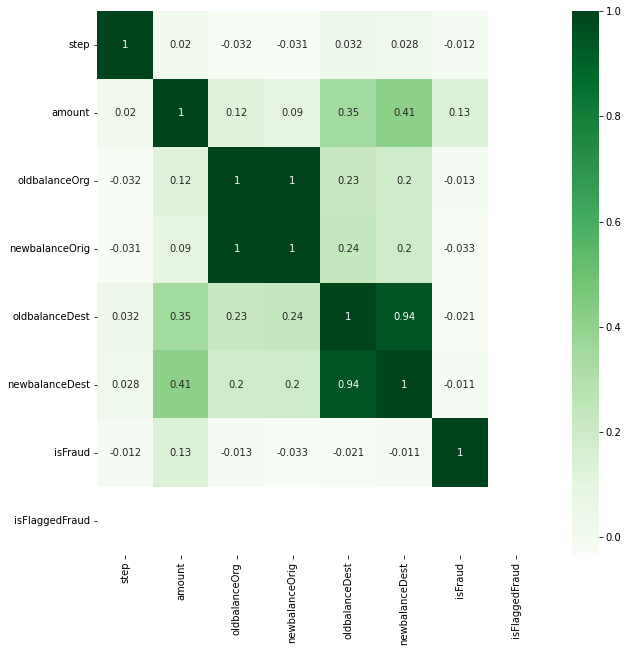

In [14]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Greens")

In [15]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [16]:
#Get the Independent and Dependent Features
X=df.iloc[:,0:6]
Y=df.iloc[:,6]

In [17]:
Y

0       0
1       0
2       1
3       1
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: isFraud, Length: 10000, dtype: int64

In [18]:
############################################# 2. ###################################################
# (Train Test Split / Feature Scaling)

In [19]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [20]:
len(X_train)

8000

In [21]:
len(X_test)

2000

In [22]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
############################################# 3.1 ###################################################
# (Knn)

In [24]:
#Call the kNN Classifier
from sklearn.neighbors import KNeighborsClassifier
#Initiating the classifier
classifier_kn = KNeighborsClassifier()
#Passing the data to the classifier
classifier_kn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
# Predicting the Test set results
y_pred_kn = classifier_kn.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
result_kn = confusion_matrix(y_test, y_pred_kn)
print('Confusion Matrix')
print(result)

Confusion Matrix
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [27]:
result1_kn = classification_report(y_test, y_pred_kn)
print('Classification Report')
print(result1_kn)

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1986
           1       0.00      0.00      0.00        14

    accuracy                           0.99      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.99      0.99      0.99      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
result2_kn = accuracy_score(y_test, y_pred_kn)
print('Accuracy: ', result2_kn)

Accuracy:  0.993


In [29]:
############################################# 3.2 ###################################################
# (Decision Tree)

In [30]:
#Call the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
#Initiating the classifier
classifier_dt = DecisionTreeClassifier()
#Passing the data to the classifier
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
# Predicting the Test set results
y_pred_dt = classifier_dt.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
result_dt = confusion_matrix(y_test, y_pred_dt)
print('Confusion Matrix')
print(result_dt)

Confusion Matrix
[[1985    1]
 [   3   11]]


In [33]:
result1_dt = classification_report(y_test, y_pred_dt)
print('Classification Report')
print(result1_dt)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1986
           1       0.92      0.79      0.85        14

    accuracy                           1.00      2000
   macro avg       0.96      0.89      0.92      2000
weighted avg       1.00      1.00      1.00      2000



In [34]:
result2_dt = accuracy_score(y_test, y_pred_dt)
print('Accuracy: ', result2_dt)

Accuracy:  0.998


In [35]:
############################################# 3.3 ###################################################
# (Naive Bayes)

In [36]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [37]:
# Predicting the Test set results
y_pred_nb = classifier_nb.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
result_nb = confusion_matrix(y_test, y_pred_nb)
print('Confusion Matrix')
print(result)

Confusion Matrix
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [39]:
result1_nb = classification_report(y_test, y_pred_nb)
print('Classification Report')
print(result1_nb)

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1986
           1       0.07      0.14      0.09        14

    accuracy                           0.98      2000
   macro avg       0.53      0.56      0.54      2000
weighted avg       0.99      0.98      0.98      2000



In [40]:
result2_nb = accuracy_score(y_test, y_pred_nb)
print('Accuracy: ', result2_nb)

Accuracy:  0.9805


In [41]:
############################################# 3.4 ###################################################
# (XGBoost) 

In [42]:
classifier_xgb=xgboost.XGBClassifier()
classifier_xgb.fit(X_train,y_train)

XGBClassifier()

In [43]:
y_pred_xgb = classifier_xgb.predict(X_test)

In [44]:
result_xgb = confusion_matrix(y_test, y_pred_xgb)
print('Confusion Matrix')
print(result_xgb)

Confusion Matrix
[[1986    0]
 [  13    1]]


In [45]:
result_xgb = classification_report(y_test, y_pred_xgb)
print('Classification Report')
print(result_xgb)

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1986
           1       1.00      0.07      0.13        14

    accuracy                           0.99      2000
   macro avg       1.00      0.54      0.57      2000
weighted avg       0.99      0.99      0.99      2000



In [46]:
print('Accuracy is ' ,round(accuracy_score(y_test, y_pred_xgb)*100,4), '%')

Accuracy is  99.35 %


In [47]:
############################################# 3.5 ###################################################
# (Random Forest / ROC AUC)

In [48]:
# Fitting RFClassifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=10)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [49]:
# Predicting the Test set results
y_pred_rf = classifier_rf.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
result_rf = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix')
print(result_rf)

Confusion Matrix
[[1986    0]
 [   8    6]]


In [51]:
result1_rf = classification_report(y_test, y_pred_rf)
print('Classification Report')
print(result1_rf)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1986
           1       1.00      0.43      0.60        14

    accuracy                           1.00      2000
   macro avg       1.00      0.71      0.80      2000
weighted avg       1.00      1.00      1.00      2000



In [52]:
result2_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy: ', result2_rf)

Accuracy:  0.996


In [53]:
############################################# 4. ################################################### 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

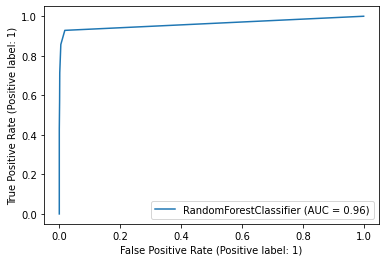

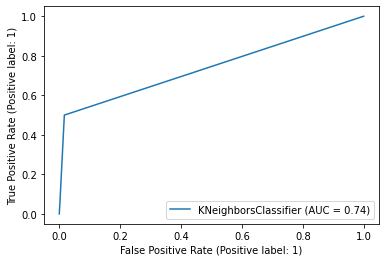

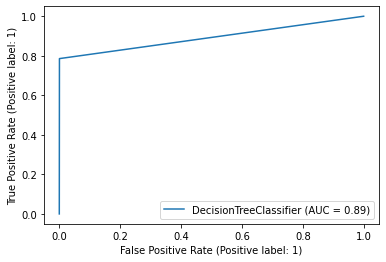

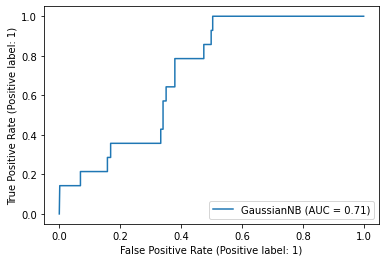

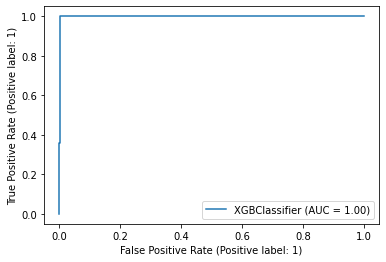

In [54]:
from sklearn import metrics

# Random Forest
metrics.plot_roc_curve(classifier_rf, X_test, y_test)  
# K-nn
metrics.plot_roc_curve(classifier_kn, X_test, y_test) 
# Decision Tree
metrics.plot_roc_curve(classifier_dt, X_test, y_test)
# Naive Bayes
metrics.plot_roc_curve(classifier_nb, X_test, y_test) 
# XGB
metrics.plot_roc_curve(classifier_xgb, X_test, y_test)  

plt.show() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

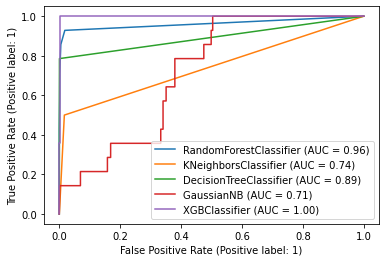

In [55]:
classifiers_all = [classifier_rf,classifier_kn,classifier_dt,classifier_nb,classifier_xgb]
ax = plt.gca()
for i in classifiers_all:
    metrics.plot_roc_curve(i, X_test, y_test, ax=ax)

In [56]:
############################################# 5.1 ###################################################
# (Class Imbalance / SMOTEENN + Random Forest)

In [57]:
# SMOTE for class imbalance problem
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
X_train_sen, y_train_sen = sm.fit_resample(X_train, y_train)
# re-shuffling and train model on re-sample data

In [58]:
#Call the Classifier
from sklearn.ensemble import RandomForestClassifier
sm_rf = RandomForestClassifier(n_estimators=10)
sm_rf.fit(X_train_sen, y_train_sen)

RandomForestClassifier(n_estimators=10)

In [59]:
y_pred_rrf = sm_rf.predict(X_test)
print(classification_report(y_test, y_pred_rrf))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1986
           1       0.44      0.86      0.59        14

    accuracy                           0.99      2000
   macro avg       0.72      0.92      0.79      2000
weighted avg       1.00      0.99      0.99      2000



In [60]:
result_rrf = confusion_matrix(y_test, y_pred_rrf)
print('Confusion Matrix')
print(result_rrf)

Confusion Matrix
[[1971   15]
 [   2   12]]


In [61]:
############################################# 5.2 ###################################################
# (Class Imbalance / SMOTEENN + XGBoost)

In [62]:
sm = SMOTEENN()
X_resampled_xgb, y_resampled_xgb = sm.fit_resample(X, Y)

In [63]:
xr_train_xgb,xr_test_xgb,yr_train_xgb,yr_test_xgb=train_test_split(X_resampled_xgb, y_resampled_xgb,test_size=0.2)

In [64]:
classifier_xgb_smt=xgboost.XGBClassifier()
classifier_xgb_smt.fit(xr_train_xgb, yr_train_xgb)

XGBClassifier()

In [65]:
yr_predict_xgb_smt = classifier_xgb_smt.predict(xr_test_xgb)

In [66]:
print('Accuracy is ' ,round(accuracy_score(yr_test_xgb, yr_predict_xgb_smt)*100,2), '%')

Accuracy is  98.81 %


In [67]:
result1_xgb_smt = classification_report(yr_test_xgb, yr_predict_xgb_smt)
print(result1_xgb_smt)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1865
           1       0.98      1.00      0.99      1999

    accuracy                           0.99      3864
   macro avg       0.99      0.99      0.99      3864
weighted avg       0.99      0.99      0.99      3864



In [68]:
result1_xgb_smt = confusion_matrix(yr_test_xgb, yr_predict_xgb_smt)
print('Confusion Matrix')
print(result1_xgb_smt)

Confusion Matrix
[[1820   45]
 [   1 1998]]


In [69]:
############################################# 5.3 ################################################### 
"""
"""
# (Class Imbalance - XGBoost + Up/Down Sampling)

'\n'

In [70]:
from sklearn.utils import resample

data_majority = df[df['isFraud']==0]
data_minority = df[df['isFraud']==1]

In [71]:
data_majority.isFraud.value_counts()

0    9932
Name: isFraud, dtype: int64

In [72]:
data_minority.isFraud.value_counts()

1    68
Name: isFraud, dtype: int64

In [73]:
# Downsampling & Upsampling using resample method
len(df.loc[df['isFraud'] == 1])

68

In [74]:
data_majority_downsample = resample(data_majority, 
                                 replace=True,     
                                 n_samples=len(df.loc[df['isFraud'] == 1]),    
                                 random_state=123) 
data_minority_downsample = resample(data_minority, 
                                 replace=True,     
                                 n_samples=len(df.loc[df['isFraud'] == 1]),    
                                 random_state=123) 
df_train = pd.concat([data_majority_downsample, data_minority_downsample])

In [75]:
# Display new class counts
print (df_train.isFraud.value_counts())

0    68
1    68
Name: isFraud, dtype: int64


In [76]:
df_train.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3604,2,30709.74,0.00,0.00,0.00,0.00,0,0
1357,1,4074.17,574.00,0.00,0.00,0.00,0,0
5260,5,1948.60,441.00,0.00,0.00,0.00,0,0
7829,7,3751.13,983668.00,979916.87,0.00,0.00,0,0
9853,7,120142.49,42244.79,0.00,139480.44,259622.93,0,0


In [77]:
"""
drop "type" column?
df_train_ds=df.drop(['type'],axis='columns')
"""
## Drop Categorical Features
df_train=df_train.drop(['isFlaggedFraud'],axis=1)

In [78]:
train, test = train_test_split(df_train, test_size = 0.2)
 
train_y_upsampled = train['isFraud']
test_y_upsampled = test['isFraud']
 
train_x_upsampled = train
train_x_upsampled.pop('isFraud')
test_x_upsampled = test
test_x_upsampled.pop('isFraud')

724     1
2910    0
5994    1
6139    0
6702    1
9678    0
4667    1
6583    1
8094    0
251     1
252     1
5853    1
3060    1
7829    0
8016    0
9284    1
2640    0
252     1
5852    1
7448    0
1170    0
4487    0
1870    1
6703    1
4221    0
6682    0
9641    0
7410    0
Name: isFraud, dtype: int64

Accuracy of XGBoost classifier on test set: 0.64
              precision    recall  f1-score   support

           0       0.67      0.57      0.62        14
           1       0.62      0.71      0.67        14

    accuracy                           0.64        28
   macro avg       0.65      0.64      0.64        28
weighted avg       0.65      0.64      0.64        28



Text(0.5, 15.0, 'Predicted label')

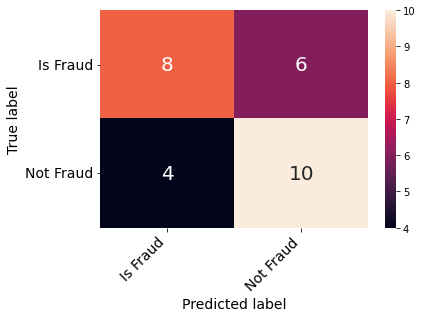

In [79]:
classifier_rsp=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)


#XGBClassifier_balanced = XGBClassifier()
classifier_rsp.fit(X=train_x_upsampled, y=train_y_upsampled)
 
test_y_pred_balanced = classifier_rsp.predict(test_x_upsampled)
print('Accuracy of XGBoost classifier on test set: {:.2f}'.format(classifier_rsp.score(test_x_upsampled, test_y_upsampled)))
print(classification_report(test_y_upsampled, test_y_pred_balanced))

"""
Line 3 is fraud / is not fraud
"""

from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix_us1 = confusion_matrix(test_y_upsampled, test_y_pred_balanced)
confusion_matrix_us2 = pd.DataFrame(confusion_matrix_us1, ('Is Fraud', 'Not Fraud'), ('Is Fraud', 'Not Fraud'))
heatmap = sns.heatmap(confusion_matrix_us2, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

In [80]:
"""
"""
result_rrf_rsp = confusion_matrix(test_y_upsampled, test_y_pred_balanced)
print('Confusion Matrix')
print(result_rrf_rsp)

Confusion Matrix
[[ 8  6]
 [ 4 10]]


In [ ]:
############################################# Up Sampling ################################################### 
"""
"""

In [ ]:
df_minority_upsampled = resample(data_minority, 
                                 replace=True,     
                                 n_samples=len(df.loc[df['isFraud'] == 0]),    
                                 random_state=123) 

df_train_up = pd.concat([data_majority, df_minority_upsampled])

In [ ]:
# Display new class counts
print (df_train_up.isFraud.value_counts())

0    9932
1    9932
Name: isFraud, dtype: int64


In [ ]:
df_train_up

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.00,160296.36,0.0,0.00,0,0
1,1,1864.28,21249.00,19384.72,0.0,0.00,0,0
4,1,11668.14,41554.00,29885.86,0.0,0.00,0,0
5,1,7817.71,53860.00,46042.29,0.0,0.00,0,0
6,1,7107.77,183195.00,176087.23,0.0,0.00,0,0
...,...,...,...,...,...,...,...,...
252,1,2806.00,2806.00,0.00,26202.0,0.00,1,0
7029,6,85354.69,85354.69,0.00,0.0,0.00,1,0
3162,2,963532.14,963532.14,0.00,0.0,0.00,1,0
4693,4,13707.11,13707.11,0.00,0.0,0.00,1,0


In [ ]:
#df_train_up=df_train_up.drop(['isFlaggedFraud'],axis=1)

In [ ]:
train, test = train_test_split(df_train_up, test_size = 0.2)
 
train_y_upsampled = train['isFraud']
test_y_upsampled = test['isFraud']
 
train_x_upsampled = train
train_x_upsampled.pop('isFraud')
test_x_upsampled = test
test_x_upsampled.pop('isFraud')

4441    1
6707    1
3683    1
9685    0
7030    1
       ..
4858    1
9752    0
21      0
4104    1
8054    0
Name: isFraud, Length: 3973, dtype: int64

In [ ]:
df_train_up.isFraud.value_counts()

0    9932
1    9932
Name: isFraud, dtype: int64

In [ ]:
"""
"""
classifier_2rsp=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)


#XGBClassifier_balanced = XGBClassifier()
classifier_2rsp.fit(X=train_x_upsampled, y=train_y_upsampled)
 
test_y_pred_balanced_2rsp = classifier_2rsp.predict(test_x_upsampled)
print('Accuracy of XGBoost classifier on test set: {:.2f}'.format(classifier_2rsp.score(test_x_upsampled, test_y_upsampled)))
print(classification_report(test_y_upsampled, test_y_pred_balanced_2rsp))


Accuracy of XGBoost classifier on test set: 1.00
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1973
           1       0.99      1.00      1.00      2000

    accuracy                           1.00      3973
   macro avg       1.00      1.00      1.00      3973
weighted avg       1.00      1.00      1.00      3973



In [233]:
"""
"""
result_rrf_rsp2 = confusion_matrix(test_y_upsampled, test_y_pred_balanced_2rsp)
print('Confusion Matrix')
print(result_rrf_rsp2)

Confusion Matrix
[[1958   15]
 [   0 2000]]


'\nValueError\n'

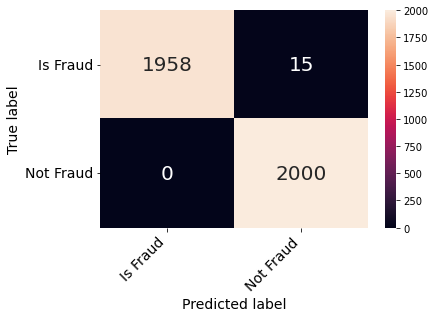

In [235]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix_us_3 = confusion_matrix(test_y_upsampled, test_y_pred_balanced_2rsp)
confusion_matrix_us_4 = pd.DataFrame(confusion_matrix_us_3, ('Is Fraud', 'Not Fraud'), ('Is Fraud', 'Not Fraud'))
heatmap = sns.heatmap(confusion_matrix_us_4, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)


In [236]:
############################################# 6.1 ###################################################

# Hyper Parameter Optimization - Manual HPT - Raw Data

In [237]:
from sklearn.metrics import roc_auc_score

#leaf_size = [2,3,5,10]
n_estimators_list = [1,2,3,10]

for estim_list in n_estimators_list:
    model_mhpt = RandomForestClassifier(n_estimators=estim_list)
    model_mhpt.fit(X_train, y_train)
    y_pred_mhpt = model_mhpt.predict(X_test)
    result_mhpt = confusion_matrix(y_test, y_pred_mhpt)
    result2_mhpt = accuracy_score(y_test, y_pred_mhpt)
    print('\n Estimator value: ', estim_list)
    print('Accuracy: ', result2_mhpt)


 Estimator value:  1
Accuracy:  0.9945

 Estimator value:  2
Accuracy:  0.994

 Estimator value:  3
Accuracy:  0.997

 Estimator value:  10
Accuracy:  0.9955


In [238]:
leaf_size = [1,2,3,5,10]

for i in leaf_size:
    model_mhpt = RandomForestClassifier(n_estimators=100, min_samples_leaf = i)
    model_mhpt.fit(X_train, y_train)
    y_pred_mhpt = model_mhpt.predict(X_test)
    result_mhpt = confusion_matrix(y_test, y_pred_mhpt)
    result2_mhpt = accuracy_score(y_test, y_pred_mhpt)
    print('\n Leaf size: ', i)
    print('Accuracy: ', result2_mhpt)


 Leaf size:  1
Accuracy:  0.996

 Leaf size:  2
Accuracy:  0.9945

 Leaf size:  3
Accuracy:  0.9945

 Leaf size:  5
Accuracy:  0.994

 Leaf size:  10
Accuracy:  0.993


In [239]:
############################################# 6.2 ###################################################

# Hyper Parameter Optimization - Randomized Search - Raw Data

In [240]:
import numpy as np
n_estimators_rs = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators_rs

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [241]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators_rs = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators_rs,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [243]:
"""
24 seconds
"""
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 3, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=3,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [244]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

In [245]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Accuracy = 1.00%.


In [246]:
best_random = rf_random.best_estimator_
print(best_random)
random_accuracy = evaluate(best_random, X_test, y_test)

RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=2,
                       n_estimators=1000)
Model Performance
Accuracy = 1.00%.


In [247]:
best_random

RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=2,
                       n_estimators=1000)

In [248]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.05%.


In [249]:
############################################# 6.3 ###################################################

# Hyper Parameter Optimization - Grid Search - Raw Data

In [250]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [251]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf_gd = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_gd, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [252]:
"""
14 mins
"""
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 288 candidates, totalling 576 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [253]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_train, y_train)

Model Performance
Accuracy = 1.00%.


In [254]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.25%.


In [255]:
best_grid

RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=300)

In [256]:
############################################# 6.4 ###################################################

# Hyper Parameter Optimization - Randomized Search + XGBoost - Raw Data

In [257]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [258]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [259]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [260]:
classifier_new=xgboost.XGBClassifier()

In [261]:
random_search=RandomizedSearchCV(classifier_new,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=3,verbose=3)

In [262]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,Y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits

 Time taken: 0 hours 0 minutes and 3.89 seconds.


In [263]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=12,
              min_child_weight=3)

In [264]:
random_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.0,
 'learning_rate': 0.05,
 'max_depth': 12,
 'min_child_weight': 3}

In [265]:
############################################# 7.1 ###################################################

# Hyper Parameter Optimization - Manual HPT --> 5.2 SMOTEENN Data - RF Classifier

In [266]:
xr_train_xgb.tail()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2044,1,131011.300000,2.614950e+06,2745960.83,2.282751e+05,97263.78
6659,6,212665.960000,0.000000e+00,0.00,1.392759e+07,14658353.25
14764,2,4740.994985,4.740995e+03,0.00,1.146322e+04,0.00
18021,1,2613.696546,2.613697e+03,0.00,2.583424e+04,0.00
2150,1,27948.650000,1.180034e+06,1207982.87,3.055729e+04,2608.64


In [267]:
yr_train_xgb.tail()

2044     0
6659     0
14764    1
18021    1
2150     0
Name: isFraud, dtype: int64

In [268]:
from sklearn.metrics import roc_auc_score

#leaf_size = [2,3,5,10]
n_estimators_list = [1,2,3,10]

for estim_list in n_estimators_list:
    model_mhpt_FNL = RandomForestClassifier(n_estimators=estim_list)
    model_mhpt_FNL.fit(xr_train_xgb, yr_train_xgb) #
    y_pred_mhpt_FNL = model_mhpt_FNL.predict(xr_test_xgb) #
    result_mhpt_FNL = confusion_matrix(yr_test_xgb, y_pred_mhpt_FNL) #
    result2_mhpt_FNL = accuracy_score(yr_test_xgb, y_pred_mhpt_FNL)  #
    print('\n Estimator value: ', estim_list)
    print('Accuracy: ', result2_mhpt_FNL)


 Estimator value:  1
Accuracy:  0.9899250839576337

 Estimator value:  2
Accuracy:  0.9914750710410747

 Estimator value:  3
Accuracy:  0.9956083699302506

 Estimator value:  10
Accuracy:  0.997933350555412


In [269]:
leaf_size = [1,2,3,5,10]

for i in leaf_size:
    model_mhpt_FNL = RandomForestClassifier(n_estimators=100, min_samples_leaf = i)
    model_mhpt_FNL.fit(xr_train_xgb, yr_train_xgb) #
    y_pred_mhpt_FNL = model_mhpt_FNL.predict(xr_test_xgb) #
    result_mhpt_FNL = confusion_matrix(yr_test_xgb, y_pred_mhpt_FNL) #
    result2_mhpt_FNL = accuracy_score(yr_test_xgb, y_pred_mhpt_FNL) #
    print('\n Leaf size: ', i)
    print('Accuracy: ', result2_mhpt_FNL)


 Leaf size:  1
Accuracy:  0.9976750193748385

 Leaf size:  2
Accuracy:  0.9974166881942651

 Leaf size:  3
Accuracy:  0.9971583570136916

 Leaf size:  5
Accuracy:  0.9961250322913976

 Leaf size:  10
Accuracy:  0.9950917075691036


In [270]:
train_x_upsampled.shape

(15891, 7)

In [271]:
train_y_upsampled.shape

(15891,)

In [272]:
test_x_upsampled.shape

(3973, 7)

In [273]:
test_y_upsampled.shape

(3973,)

In [274]:
df_train.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
3604,2,30709.74,0.00,0.00,0.00,0.00,0
1357,1,4074.17,574.00,0.00,0.00,0.00,0
5260,5,1948.60,441.00,0.00,0.00,0.00,0
7829,7,3751.13,983668.00,979916.87,0.00,0.00,0
9853,7,120142.49,42244.79,0.00,139480.44,259622.93,0


In [275]:
############################################# 7.2 ###################################################

# Hyper Parameter Optimization - Randomized Search - SMOTEENN Data - RF Classifier

In [276]:
import numpy as np
n_estimators_rs = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators_rs

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [277]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators_rs = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators_rs,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [278]:
"""
5 mins
"""
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xr_train_xgb, yr_train_xgb) ##

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [279]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

In [280]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(xr_train_xgb, yr_train_xgb)
base_accuracy = evaluate(base_model, xr_test_xgb, yr_test_xgb)

Model Performance
Accuracy = 1.00%.


In [281]:
best_random = rf_random.best_estimator_
print(best_random)
random_accuracy = evaluate(best_random, xr_test_xgb, yr_test_xgb)

RandomForestClassifier(bootstrap=False, max_depth=70, min_samples_split=5,
                       n_estimators=1800)
Model Performance
Accuracy = 1.00%.


In [282]:
best_random

RandomForestClassifier(bootstrap=False, max_depth=70, min_samples_split=5,
                       n_estimators=1800)

In [283]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.00%.


In [284]:
############################################# 7.3 ###################################################

# Hyper Parameter Optimization - Grid Search - SMOTEENN Data - RF Classifier

In [285]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [286]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf_gd = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_gd, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [287]:
"""
26 mins
"""
# Fit the grid search to the data
grid_search.fit(xr_train_xgb, yr_train_xgb) #
grid_search.best_params_

Fitting 2 folds for each of 288 candidates, totalling 576 fits


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [288]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, xr_train_xgb, yr_train_xgb)

Model Performance
Accuracy = 1.00%.


In [289]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.16%.


In [290]:
best_grid

RandomForestClassifier(max_depth=90, max_features=2, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=200)

In [291]:
############################################# 7.4 ###################################################

# Hyper Parameter Optimization - Randomized Search - SMOTEENN Data - XGBoost Classifier

In [292]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [293]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [294]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [295]:
classifier_new=xgboost.XGBClassifier()

In [296]:
random_search=RandomizedSearchCV(classifier_new,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=3,verbose=3)

In [297]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(xr_train_xgb, yr_train_xgb) #
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits

 Time taken: 0 hours 0 minutes and 8.5 seconds.


In [298]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.7, gamma=0.4, learning_rate=0.25, max_depth=12,
              min_child_weight=7)

In [299]:
random_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.4,
 'learning_rate': 0.25,
 'max_depth': 12,
 'min_child_weight': 7}

In [300]:
############################################# 7.5 ###################################################

# Hyper Parameter Optimization - Manual HPT --> 5.3 ReSampling Data

In [302]:
from sklearn.metrics import roc_auc_score

#leaf_size = [2,3,5,10]
n_estimators_list = [1,2,3,10]

for estim_list in n_estimators_list:
    model_mhpt_RSD = RandomForestClassifier(n_estimators=estim_list)
    model_mhpt_RSD.fit(train_x_upsampled, train_y_upsampled) #
    y_pred_mhpt_RSD = model_mhpt_RSD.predict(test_x_upsampled) #
    result_mhpt_RSD = confusion_matrix(test_y_upsampled, y_pred_mhpt_RSD) #
    result2_mhpt_RSD = accuracy_score(test_y_upsampled, y_pred_mhpt_RSD) #
    print('\n Estimator value: ', estim_list)
    print('Accuracy: ', result2_mhpt_RSD)


 Estimator value:  1
Accuracy:  0.9984898061917946

 Estimator value:  2
Accuracy:  0.9989932041278631

 Estimator value:  3
Accuracy:  0.9997483010319658

 Estimator value:  10
Accuracy:  0.9997483010319658


In [ ]:
"""
ValueError                                Traceback (most recent call last)
----> 6     y_pred_mhpt_RSD = model_mhpt.predict(test_x_upsampled) #
ValueError: X has 7 features, but RandomForestClassifier is expecting 6 features as input.
"""

leaf_size = [1,2,3,5,10]

for i in leaf_size:
    model_mhpt_RSD = RandomForestClassifier(n_estimators=100, min_samples_leaf = i)
    model_mhpt_RSD.fit(train_x_upsampled, train_y_upsampled) #
    y_pred_mhpt_RSD = model_mhpt.predict(test_x_upsampled) #
    result_mhpt_RSD = confusion_matrix(test_y_upsampled, y_pred_mhpt_RSD) #
    result2_mhpt_RSD = accuracy_score(test_y_upsampled, y_pred_mhpt_RSD) #
    print('\n Leaf size: ', i)
    print('Accuracy: ', result2_mhpt_RSD)

In [ ]:
############################################# 7.6 ###################################################

# Hyper Parameter Optimization - Randomized Search - 5.3 ReSampling Data

In [ ]:
############################################# 7.7 ###################################################

# Hyper Parameter Optimization - Grid Search - 5.3 ReSampling Data

In [ ]:
############################################# 7.8 ###################################################

# Hyper Parameter Optimization - Randomized Search + XGBoost - 5.3 ReSampling Data

In [ ]:
############################################# 8.1 ###################################################

# Applying HPO to XGBoost on SMOTENN Data

In [303]:
classifier_SM_HPO_FINAL=xgboost.XGBClassifier(colsample_bytree=0.7, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=7) 
# insert best params here

In [304]:
classifier_SM_HPO_FINAL = classifier_SM_HPO_FINAL.fit(xr_train_xgb,yr_train_xgb)

#At last we need to make prediction. It can be done with the help of following script −
y_pred_SM_HPO_FINAL = classifier_SM_HPO_FINAL.predict(xr_test_xgb)

In [305]:
#Next, we can get the accuracy score, confusion matrix and classification report as follows −
result_SM_HPO_FINAL = confusion_matrix(yr_test_xgb, y_pred_SM_HPO_FINAL)
print("Confusion Matrix:")
print(result_SM_HPO_FINAL)
result1_SM_HPO_FINAL = classification_report(yr_test_xgb, y_pred_SM_HPO_FINAL)
print("Classification Report:",)
print (result1_SM_HPO_FINAL)
result2_SM_HPO_FINAL = accuracy_score(yr_test_xgb,y_pred_SM_HPO_FINAL)
print("Accuracy:",result2_SM_HPO_FINAL)

Confusion Matrix:
[[1869   11]
 [   0 1991]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1880
           1       0.99      1.00      1.00      1991

    accuracy                           1.00      3871
   macro avg       1.00      1.00      1.00      3871
weighted avg       1.00      1.00      1.00      3871

Accuracy: 0.9971583570136916


In [306]:
result3_SM_HPO_FINAL = confusion_matrix(yr_test_xgb, y_pred_SM_HPO_FINAL)
print('Confusion Matrix')
print(result3_SM_HPO_FINAL)

Confusion Matrix
[[1869   11]
 [   0 1991]]


In [307]:
############################################# 8.2 ###################################################

# Applying HPO to Random Forest

In [308]:
# Fitting RFClassifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_2_SM_HPO_FINAL = RandomForestClassifier(max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200) 
# insert HPO here
classifier_2_SM_HPO_FINAL.fit(xr_train_xgb, yr_train_xgb)

RandomForestClassifier(max_depth=90, max_features=2, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=200)

In [309]:
# Predicting the Test set results
y_pred_2_SM_HPO_FINAL = classifier_2_SM_HPO_FINAL.predict(xr_test_xgb)

In [310]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
result_2_SM_HPO_FINAL = confusion_matrix(yr_test_xgb, y_pred_2_SM_HPO_FINAL)
print('Confusion Matrix')
print(result_2_SM_HPO_FINAL)

Confusion Matrix
[[1869   11]
 [   1 1990]]


In [311]:
result1_2_SM_HPO_FINAL = classification_report(yr_test_xgb, y_pred_2_SM_HPO_FINAL)
print('Classification Report')
print(result1_2_SM_HPO_FINAL)

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1880
           1       0.99      1.00      1.00      1991

    accuracy                           1.00      3871
   macro avg       1.00      1.00      1.00      3871
weighted avg       1.00      1.00      1.00      3871



In [312]:
result2_2_SM_HPO_FINAL = accuracy_score(yr_test_xgb, y_pred_2_SM_HPO_FINAL)
print('Accuracy: ', result2_2_SM_HPO_FINAL)

Accuracy:  0.9969000258331181


In [ ]:
"""
"""

"""
"""

#########################################################################################################################